In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns #library for making statistical graphics in python


In [3]:
data = pd.read_csv('housing.csv')

In [5]:
data.dropna(inplace = True)

In [7]:
from sklearn.model_selection import train_test_split 
X = data.drop(['median_house_value'], axis = 1)
y = data['median_house_value']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [11]:
train_data = X_train.join(y_train)

In [13]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
5640,-118.30,33.75,48.0,1958.0,386.0,1098.0,380.0,4.6250,<1H OCEAN,273400.0
14284,-117.13,32.72,9.0,2436.0,720.0,1780.0,653.0,1.8299,NEAR OCEAN,137500.0
3086,-118.59,35.72,28.0,1491.0,408.0,98.0,48.0,1.4205,INLAND,90000.0
5653,-118.29,33.73,30.0,2835.0,711.0,1669.0,652.0,3.3616,NEAR OCEAN,268500.0
5879,-118.35,34.16,49.0,1305.0,228.0,584.0,255.0,5.6360,<1H OCEAN,267900.0
...,...,...,...,...,...,...,...,...,...,...
19323,-122.97,38.50,44.0,3234.0,746.0,1112.0,470.0,1.9265,<1H OCEAN,132700.0
12108,-117.31,33.97,28.0,3420.0,691.0,1502.0,656.0,3.4896,INLAND,140300.0
5827,-118.30,34.19,51.0,1502.0,243.0,586.0,231.0,4.3750,<1H OCEAN,332400.0
7132,-118.12,34.03,20.0,2595.0,428.0,1751.0,479.0,5.6112,<1H OCEAN,308000.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

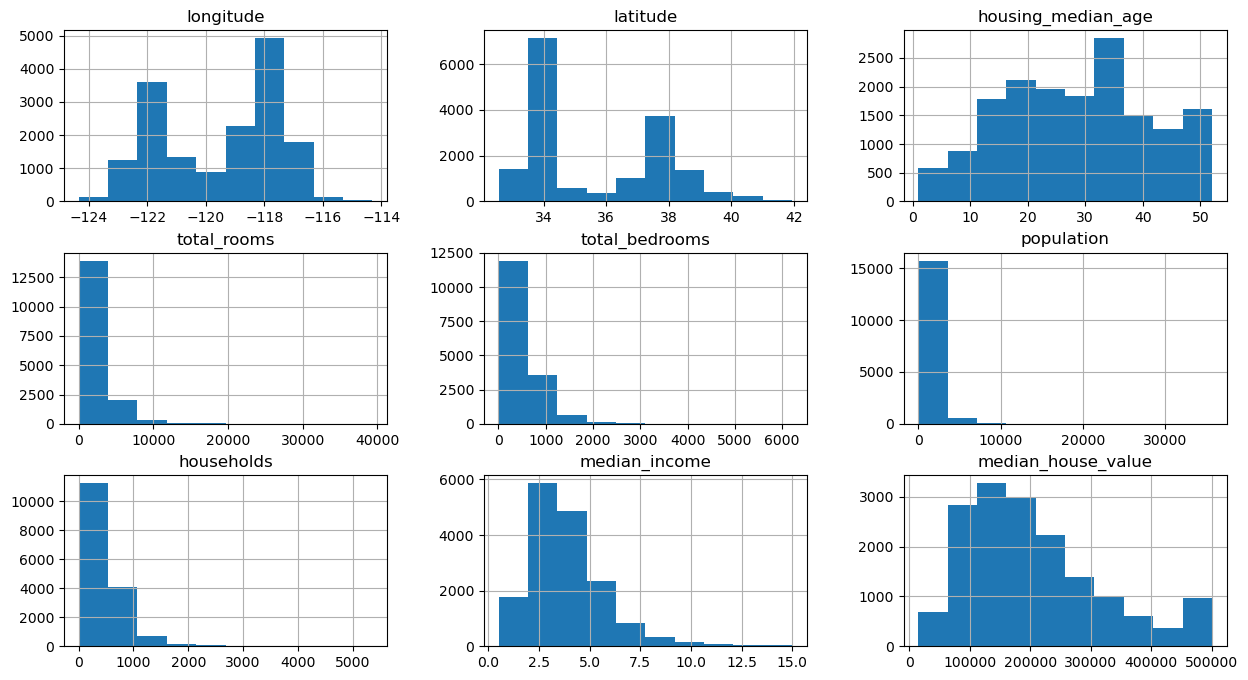

In [15]:
train_data.hist(figsize = (15, 8))

In [16]:
train_data.ocean_proximity.value_counts();

In [17]:
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'], axis = 1)

In [18]:
train_data['total_rooms'] = np.log(train_data['total_rooms']+1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms']+1)
train_data['population'] = np.log(train_data['population']+1)
train_data['households'] = np.log(train_data['households']+1)


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

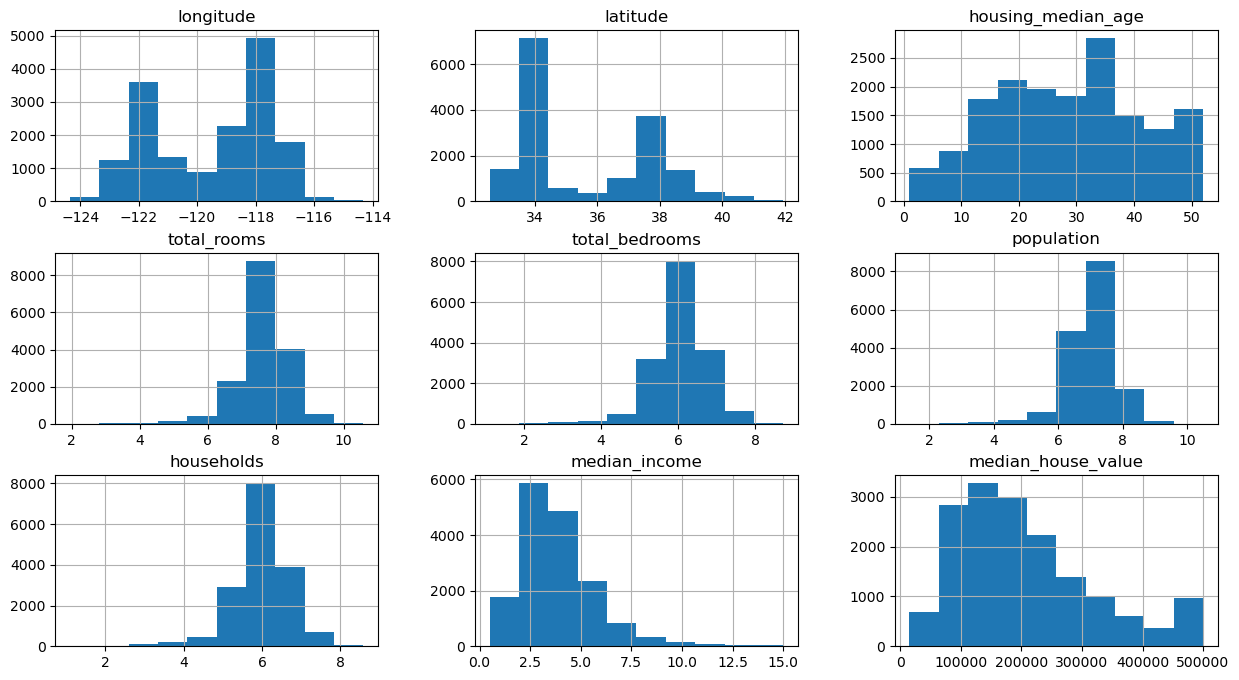

In [19]:
train_data.hist(figsize = (15, 8))

<Axes: >

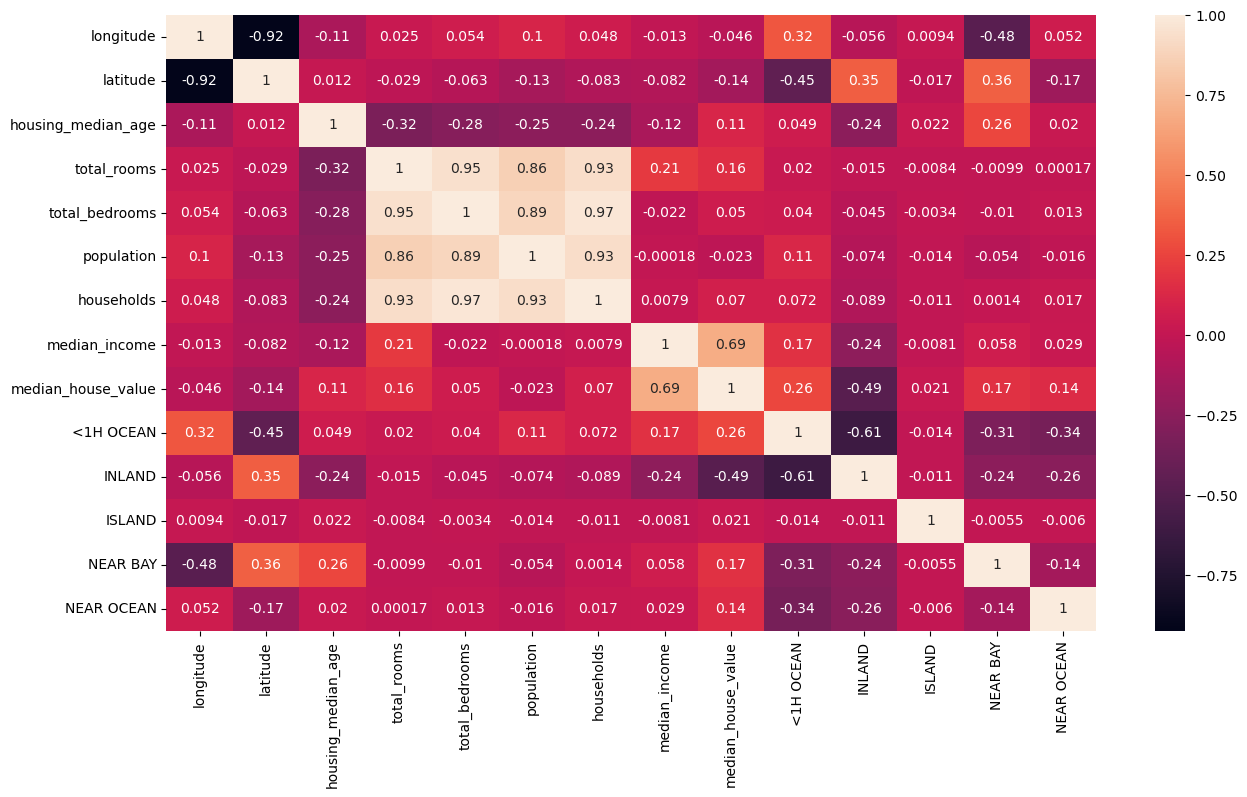

In [20]:
plt.figure(figsize = (15, 8))
sns.heatmap(train_data.corr(), annot = True)


<Axes: xlabel='latitude', ylabel='longitude'>

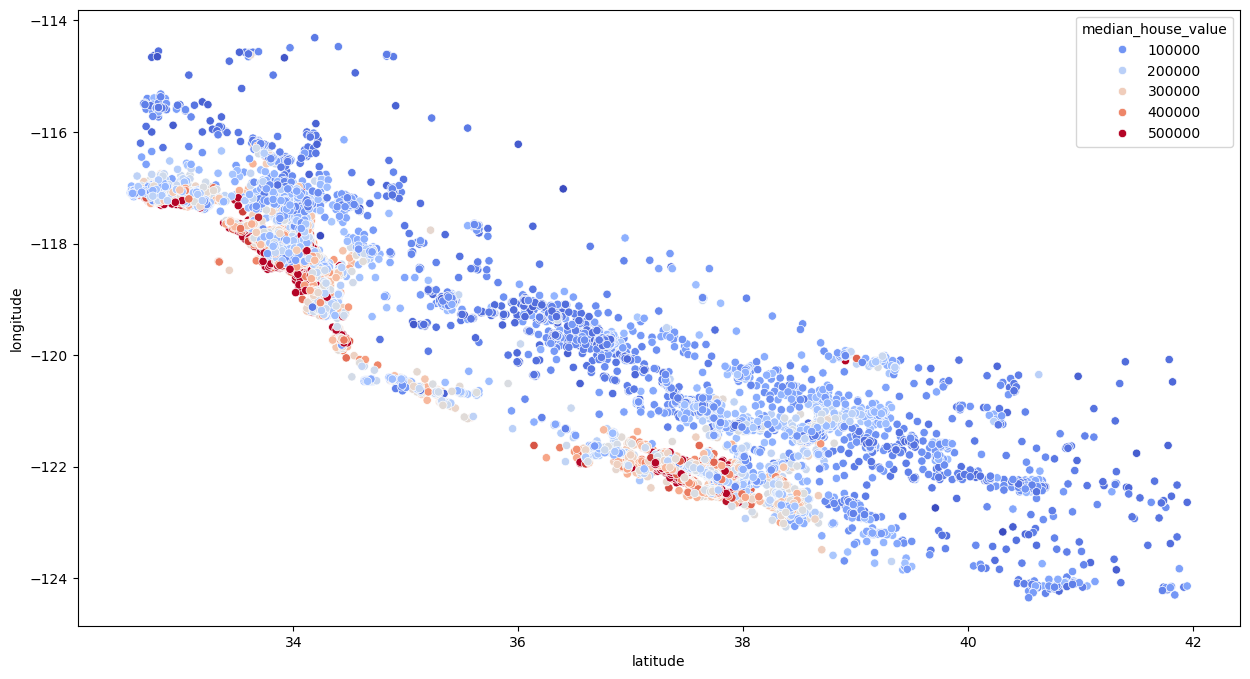

In [25]:
plt.figure(figsize = (15, 8))
sns.scatterplot(x = "latitude", y = "longitude", data = train_data, hue = "median_house_value", palette = "coolwarm")
#the more red the more expensive the house is, it shows the map of california. 



In [26]:
train_data['bedroom_ratio'] = train_data['total_bedrooms'] / train_data['total_rooms']
train_data['household_rooms'] = train_data['total_rooms'] / train_data['households'] 


<Axes: >

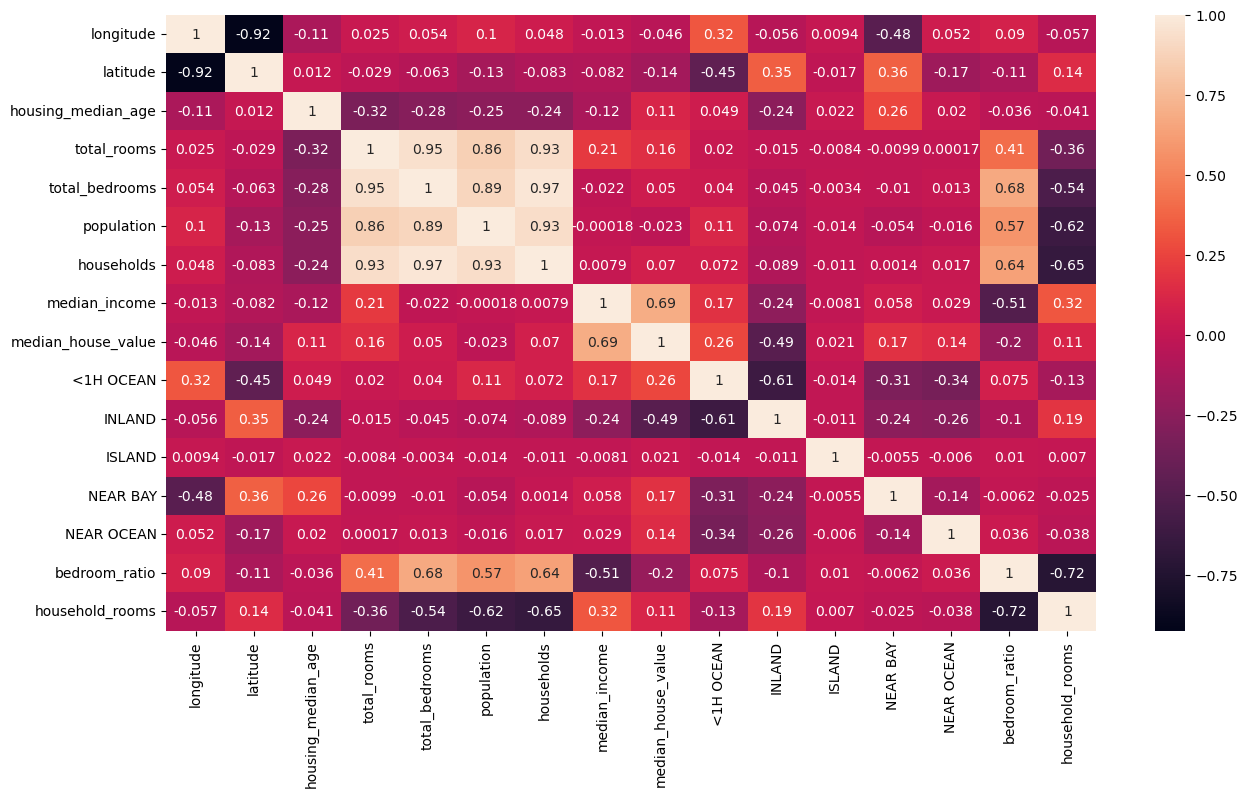

In [27]:
plt.figure(figsize = (15, 8))
sns.heatmap(train_data.corr(), annot = True)


In [33]:
from sklearn.linear_model import LinearRegression 

X_train, y_train = train_data.drop(['median_house_value'], axis = 1), train_data['median_house_value']

reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [35]:
test_data = X_test.join(y_test)

test_data['total_rooms'] = np.log(test_data['total_rooms']+1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms']+1)
test_data['population'] = np.log(test_data['population']+1)
test_data['households'] = np.log(test_data['households']+1)

test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(['ocean_proximity'], axis = 1)

test_data['bedroom_ratio'] = test_data['total_bedrooms'] / test_data['total_rooms']
test_data['household_rooms'] = test_data['total_rooms'] / test_data['households'] 


In [37]:
X_test, y_test = test_data.drop(['median_house_value'], axis = 1), test_data['median_house_value']

In [39]:
reg.score(X_test, y_test)

0.6678089617281879

In [41]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()

forest.fit(X_train, y_train)

RandomForestRegressor()

In [42]:
forest.score(X_test, y_test)

0.8141322135725002

In [ ]:
from sklearn.model_selection import GridSearchCV
forest = RandomForestRegressor()

param_grid = {
    "n_estimators": [100, 200, 300],
    "min_samples_split": [2, 4], 
    "max_depth": [None, 4, 8]
}

grid_search = GridSearchCV(forest, param_grid, cv = 5,
                           scoring = "neg_mean_squared_error",
                           return_train_score = True)

grid_search.fit(X_train, y_train)

In [ ]:
best_forest = grid_search.best_estimator_

In [ ]:
best_forest.score(X_test_s, y_test)
